In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import euclidean_distances as euc

# 한글출력
matplotlib.rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

In [3]:
values = np.arange(0, 101, 25)

A = np.repeat(values, 100).reshape(-1, 100)
B = np.repeat(values, 100).reshape(-1, 100) + 100

y = np.append(A,B, axis=1)
r_y = np.append(B,A, axis=1)

x = np.arange(y[0].size)

# 테스트 데이터 Plot

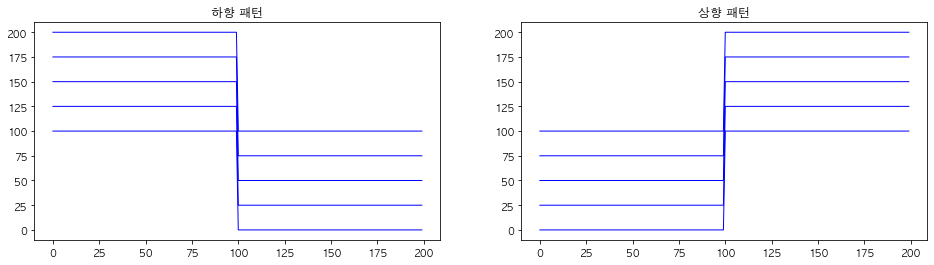

In [4]:
plt.figure(figsize=(16,4))

down_ax = plt.subplot(1,2,1)
down_ax.plot(x, r_y.T, color='b', linewidth=1.0)
down_ax.set_title("하향 패턴")


up_ax = plt.subplot(1,2,2)
up_ax.plot(x, y.T, color='b', linewidth=1.0)
up_ax.set_title("상향 패턴")

# plt.plot(x, y.T)
# plt.plot(x, r_y.T)

plt.show()

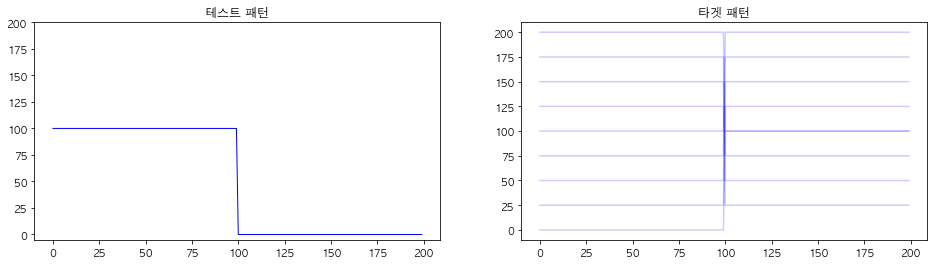

In [8]:
all_y = np.append(y, r_y[1:], axis=0)

plt.figure(figsize=(16,4))

down_ax = plt.subplot(1,2,1)
down_ax.plot(x, r_y[0], color='b', linewidth=1.0)
down_ax.set_title("테스트 패턴")
plt.yticks(range(0, 201, 25))


up_ax = plt.subplot(1,2,2)
up_ax.plot(x, all_y.T, color='b', alpha=0.2)
up_ax.set_title("타겟 패턴")

# plt.plot(x, y.T)
# plt.plot(x, r_y.T)

plt.show()

# 시계열 데이터 총 합 면에서 상위 데이터

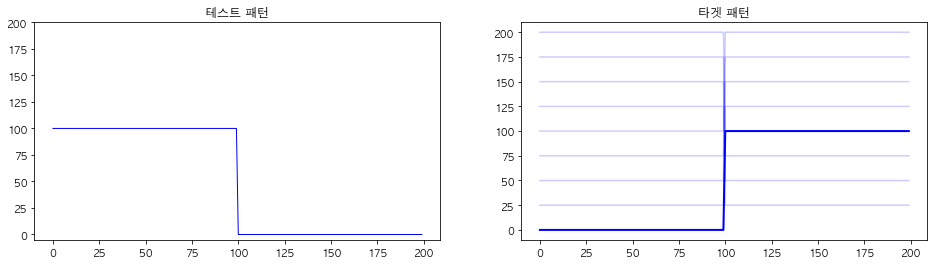

In [9]:
sum_test = r_y[0].sum().reshape(-1, 1)
sum_target = all_y.sum(axis=1).reshape(-1, 1)

sum_chk = euc(sum_test, sum_target)
sum_top_idx = sum_chk[0].argmin()

plt.figure(figsize=(16,4))

down_ax = plt.subplot(1,2,1)
down_ax.plot(x, r_y[0], color='b', linewidth=1.0)
down_ax.set_title("테스트 패턴")
plt.yticks(range(0, 201, 25))

up_ax = plt.subplot(1,2,2)
up_ax.plot(x, all_y.T, color='b', alpha=0.2)
up_ax.plot(x, all_y[sum_top_idx], color='b', linewidth=2.0)
up_ax.set_title("타겟 패턴")

plt.show()

# 시계열 패턴 상위 데이터

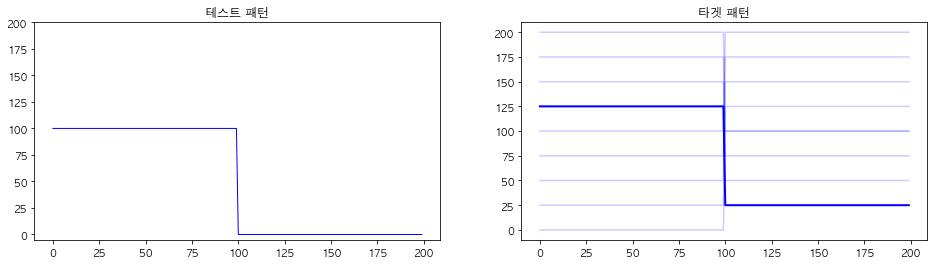

In [11]:
pat_chk = euc(r_y[0].reshape(-1, 200), all_y)
pat_top_idx = pat_chk[0].argmin()

plt.figure(figsize=(16,4))

down_ax = plt.subplot(1,2,1)
down_ax.plot(x, r_y[0], color='b', linewidth=1.0)
down_ax.set_title("테스트 패턴")
plt.yticks(range(0, 201, 25))

up_ax = plt.subplot(1,2,2)
up_ax.plot(x, all_y.T, color='b', alpha=0.2)
up_ax.plot(x, all_y[pat_top_idx], color='b', linewidth=2.0)
up_ax.set_title("타겟 패턴")

plt.show()

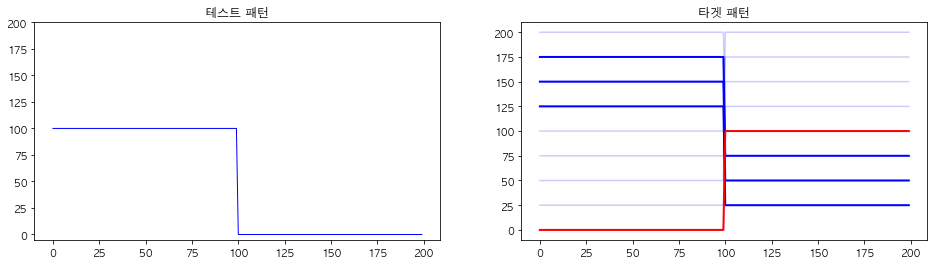

In [16]:
pat_chk = euc(r_y[0].reshape(-1, 200), all_y)
pat_sort = all_y[pat_chk.argsort()[0]]

plt.figure(figsize=(16,4))

down_ax = plt.subplot(1,2,1)
down_ax.plot(x, r_y[0], color='b', linewidth=1.0)
down_ax.set_title("테스트 패턴")
plt.yticks(range(0, 201, 25))

up_ax = plt.subplot(1,2,2)
up_ax.plot(x, all_y.T, color='b', alpha=0.2)
up_ax.plot(x, pat_sort[:3].T, color='b', linewidth=2.0)
up_ax.plot(x, pat_sort[3:4].T, color='r', linewidth=2.0)
up_ax.set_title("타겟 패턴")

plt.show()

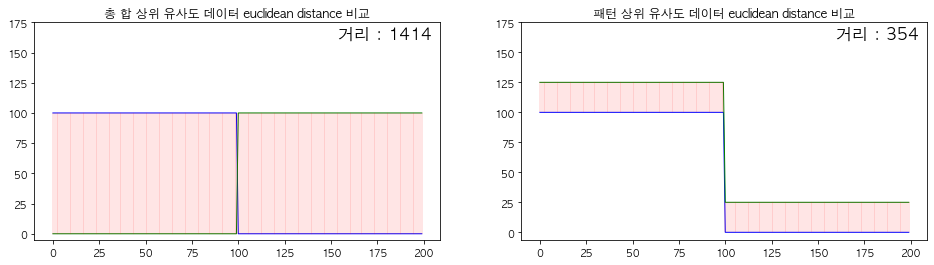

In [74]:
top_sum = sum_top_idx
top_euc = pat_top_idx

sum_chk = abs(r_y[0] - all_y[top_sum])
pat_chk = abs(r_y[0] - all_y[top_euc])

euc_chk = euc(r_y[0].reshape(-1, 200),
    np.append(all_y[top_sum], all_y[top_euc]).reshape(-1, 200))[0]

plt.figure(figsize=(16,4))

case_1 = plt.subplot(1,2, 1)
case_1.plot(x, r_y[0], color='b', linewidth=1.0)
case_1.plot(x, all_y[top_sum], color='g', linewidth=1.0)

for idx,chk in enumerate(sum_chk):
    start = all_y[top_sum][idx] if r_y[0][idx] > all_y[top_sum][idx] else r_y[0][idx]
    case_1.plot([idx, idx], [start, sum_chk[idx]], color='r', linewidth=0.2)
    
case_1.text(0.98, 0.925, "거리 : {}".format(round(euc_chk[0])),
           transform=case_1.transAxes,
           ha="right",
           fontsize=16)
case_1.set_title("총 합 상위 유사도 데이터 euclidean distance 비교")
plt.yticks(range(0, 200, 25))

case_2 = plt.subplot(1,2, 2)
case_2.plot(x, r_y[0], color='b', linewidth=1.0)
case_2.plot(x, all_y[top_euc], color='g', linewidth=1.0)

for idx,chk in enumerate(pat_chk):
    start = all_y[top_euc][idx] if r_y[0][idx] > all_y[top_euc][idx] else r_y[0][idx]
    case_2.plot([idx, idx], [start, start + pat_chk[idx]], color='r', linewidth=0.2)
    
case_2.text(0.98, 0.925, "거리 : {}".format(round(euc_chk[1])),
           transform=case_2.transAxes,
           ha="right",
           fontsize=16)
case_2.set_title("패턴 상위 유사도 데이터 euclidean distance 비교")
plt.yticks(range(0, 200, 25))

plt.show()

## Time Divison Clustering 개요

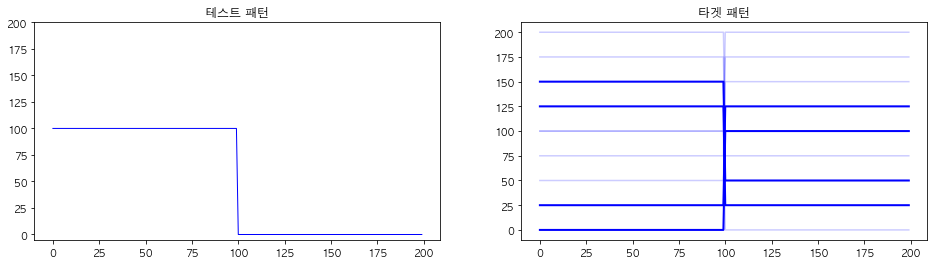

In [153]:
all_y = np.append(r_y, y,axis=0)
all_rank = all_y.argsort(axis=0).argsort(axis=0).mean(axis=1)

rank_chk = abs(all_rank[1:] - all_rank[0])
rank_sort = all_y[1:][rank_chk.argsort()]

plt.figure(figsize=(16,4))

down_ax = plt.subplot(1,2,1)
down_ax.plot(x, r_y[0], color='b', linewidth=1.0)
down_ax.set_title("테스트 패턴")
plt.yticks(range(0, 201, 25))

up_ax = plt.subplot(1,2,2)
up_ax.plot(x, all_y.T, color='b', alpha=0.2)
up_ax.plot(x, rank_sort[:4].T, color='b', linewidth=2.0)
up_ax.set_title("타겟 패턴")

plt.show()